## Data Preparation of 2D images

In [1]:
%matplotlib inline 

#%matplotlib notebook
#matplotlib widget
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy     as np
import pandas    as pd
from   scipy     import stats
import os
import matplotlib.pyplot as plt

import xyimg.dataprep as dp
import xyimg.extana   as extana
#import xyimg.cnn      as cnn


## Test

In [4]:
path = os.environ['LPRDATADIR']
extana.tests(path)

Passed all tests!


True

## Read voxels and inspect an event

In [61]:
pressure     = '13bar'
radius       = 12
samples      = ['1eroi', '0nubb']
ifile_       = lambda sample, radius: path + dp.str_concatenate(('extana/extana', pressure, sample, 'radius'+str(radius))) + '.h5'
ifilenames   = [ifile_(sample, radius) for sample in samples]
print(ifilenames)
data         =  [pd.read_hdf(ifile, "df") for ifile in ifilenames]

['/scratch/next/data/NEXT100/pressure_topology/extana/extana_13bar_1eroi_radius12.h5', '/scratch/next/data/NEXT100/pressure_topology/extana/extana_13bar_0nubb_radius12.h5']


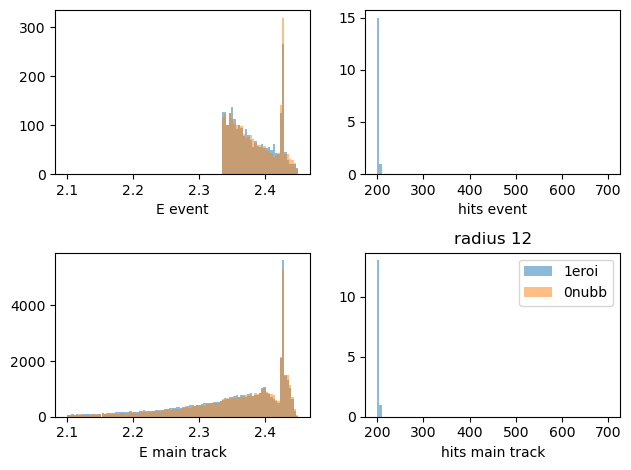

In [62]:
nbins       = 100
ene_range   = (2.1, 2.45)
hits_range  = (200, 700)
def plots_general(data):
    for label, idata in zip(samples, data):
        plt.subplot(2, 2, 1); plt.hist(idata.evtene  , nbins, ene_range, label = label, alpha = 0.5); plt.xlabel('E event');
        plt.subplot(2, 2, 2); plt.hist(idata.evtnhits, nbins, hits_range, label = label, alpha = 0.5); plt.xlabel('hits event');
        plt.subplot(2, 2, 3); plt.hist(idata.trkene  , nbins, ene_range, label = label, alpha = 0.5); plt.xlabel('E main track');
        plt.subplot(2, 2, 4); plt.hist(idata.trknhits, nbins, hits_range, label = label, alpha = 0.5); plt.xlabel('hits main track');
    plt.legend(); plt.title('radius ' + str(radius)); plt.tight_layout()

plots_general(data)



In [63]:
nbins       = 120
ene_range   = (0, 0.8)
hits_range  = (0, 120)
def plots_ext(data):
    for label, idata in zip(samples, data):
        #emax, emin = np.maximum(idata.blob1ene.values, idata.blob2ene.values)
        #emax, emin = np.maximum(idata.blob1ene.values, idata.blob2ene.values)
        plt.subplot(2, 2, 1); plt.hist(idata.blob1ene  , nbins, ene_range, label = label, alpha = 0.5); plt.xlabel('E ext1');
        plt.subplot(2, 2, 2); plt.hist(idata.blob1nhits, nbins, hits_range, label = label, alpha = 0.5); plt.xlabel('hits ext1');
        plt.subplot(2, 2, 3); plt.hist(idata.blob2ene  , nbins, ene_range, label = label, alpha = 0.5); plt.xlabel('E ext2');
        plt.subplot(2, 2, 4); plt.hist(idata.blob2nhits, nbins, hits_range, label = label, alpha = 0.5); plt.xlabel('hits ext2');
    plt.legend(); plt.title('radius ' + str(radius)); plt.tight_layout()

def plots_roc(data):
    ys = []
    for label, idata in zip(samples, data):
        plt.subplot(1, 1, 1); 
        y, _ = np.histogram(idata.blob2ene  , nbins, ene_range, density = True)
        ys.append(np.cumsum(y)/sum(y))
        plt.hist(idata.blob2ene  , nbins, ene_range, label = label, alpha = 0.5, cumulative = True, density = True); 
        plt.xlabel('E ext2');
    plt.plot(ys[0], 1-ys[1], color = 'black')
    plt.title('radius ' + str(radius));

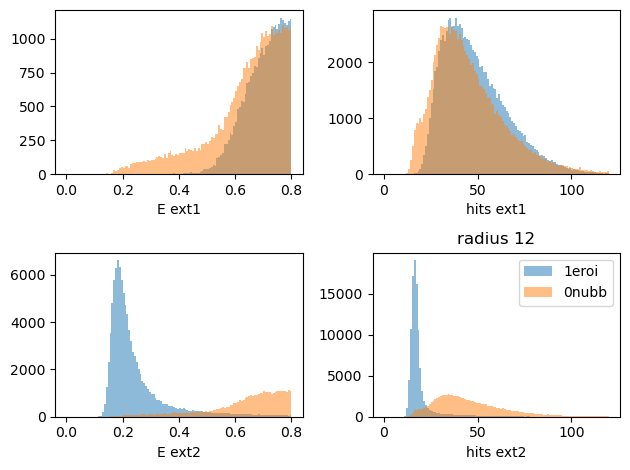

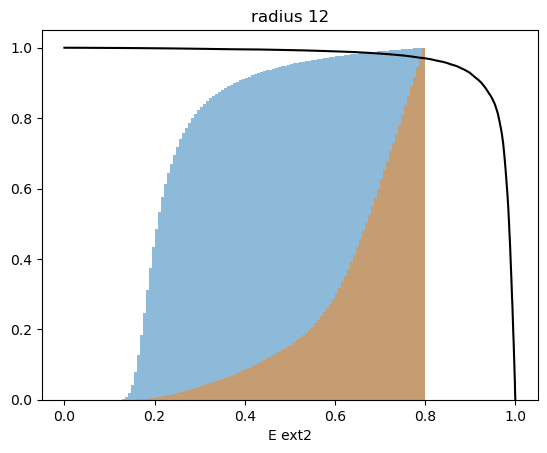

In [64]:
plots_ext(data)
plt.figure()
plots_roc(data)

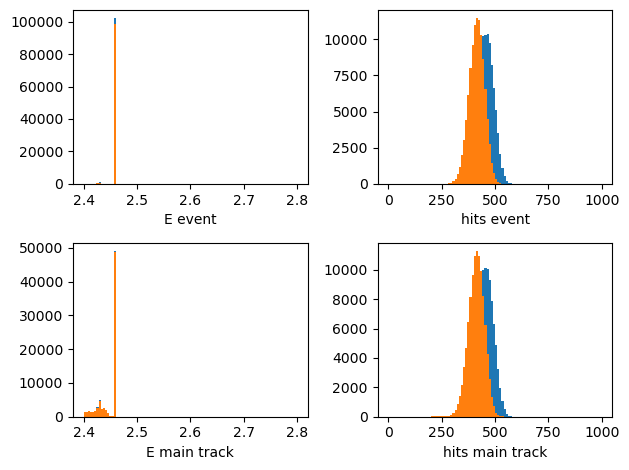

In [20]:
plots_general(data)

In [48]:
evt

,file_id,event,x,y,z,E,binclass,segclass,track_id,nhits,ext
792,1,2,370,276,389,0.044964,1,0,1,22,0
793,1,2,370,276,390,0.051520,1,0,1,9,0
794,1,2,370,277,390,0.011768,1,0,1,2,0
795,1,2,370,277,391,0.004775,1,0,1,14,0
796,1,2,376,280,396,0.029781,1,0,2,32,0
...,...,...,...,...,...,...,...,...,...,...,...
1214,1,2,495,259,425,0.000379,1,1,0,1,0
1215,1,2,495,259,428,0.002305,1,1,0,1,0
1216,1,2,495,259,429,0.005563,1,1,0,2,0
1217,1,2,495,260,425,0.003315,1,1,0,1,0


In [46]:
dd = extana._evt_data(evt)

In [47]:
dd

{'file_id': 1,
 'event': 2,
 'evtene': 2.4578302097827134,
 'evthits': 427,
 'trkene': 2.3150225729645797,
 'trkhits': 422}

In [ ]:
i1  = extana._blob_index(evt, 1)
x1  = extana._voxel_position(evt, i1)
print(i1, x1)
i2  = extana._blob_index(evt, 2)
x2 = extana._voxel_position(evt, i2)
print(i2, x2)

5 [421 206 455]
280 [463 256 408]


In [ ]:
radius = 18.
i      = 2
x, y, z = extana._voxel_position(evt, i)
dx, dy, dz = evt.x.values - x, evt.y.values - y, evt.z.values - z
dd  = np.sqrt(dx*dx + dy*dy + dz*dz)
sel = dd <= radius
ene = np.sum(evt.E[sel])
print(len(sel), sum(sel))
print(ene)


427 5
0.1428076368181337
